In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_comparisons(x, y1, y2, y3, y_label, save_loc, y1_err=None, y2_err=None, y3_err=None):
    # create an index list for x-values
    x_values = range(len(x))
    y1 = np.array(y1)
    y2 = np.array(y2)
    y3 = np.array(y3)

    fig, ax = plt.subplots()
    # add std err if over multiple seeds
    if y1_err is not None:
        y1_err = np.array(y1_err)
        y2_err = np.array(y2_err)
        y3_err = np.array(y3_err)
        ax.fill_between(x_values, y1-y1_err, y1+y1_err, color='black', alpha=0.1)
        ax.fill_between(x_values, y2-y2_err, y2+y2_err, color='green', alpha=0.1)
        ax.fill_between(x_values, y3-y3_err, y3+y3_err, color='deeppink', alpha=0.1)
    ax.plot(x_values, y1, marker='o', color='black', label='RLHF')
    ax.plot(x_values, y2, marker='o', color='green', label='Feature Preference')
    ax.plot(x_values, y3, marker='o', color='deeppink', label='Feature Preference+Prag (Ours)')

    # set x-ticks to be the comparison values
    ax.set_xticks(x_values)
    ax.set_xticklabels(x)
    ax.yaxis.set_ticks(np.arange(0.5, 1.05, 0.1))

    ax.set_xlabel('Number of Comparisons')
    ax.set_ylabel(y_label)
    ax.set_ylim(ymin=0.5)
    ax.legend(loc='lower right')
    plt.savefig(save_loc + '/0' + y_label + '_comparisons.pdf')

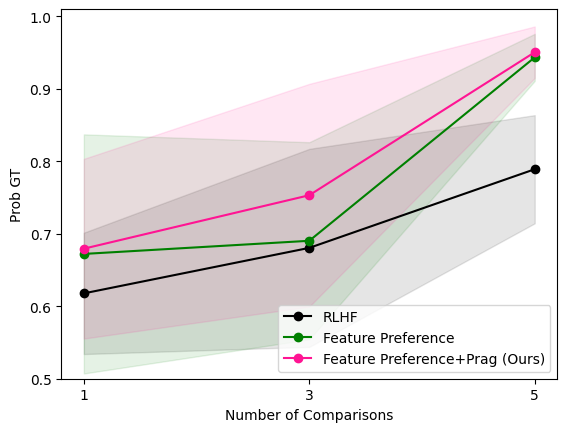

In [6]:
# PLOT COMPARISONS (MUSHROOMS) dense
comparisons = [1,3,5]

rlhf_probs = [0.6177288085222245, 0.6804775213003159, 0.7889519410371781]
rlhf_probs_err = [0.08369356294805928, 0.13655116444826837, 0.07460156649187597]
featureprefs_probs = [0.6721250541508198, 0.6902611494064331, 0.9432393074035645]
featureprefs_probs_err = [0.16490681042447883, 0.13596062618591218, 0.03246893121833119]
featureprefshuman_probs = [0.6793496966361999, 0.7530943371355533, 0.9503225207328796]
featureprefshuman_probs_err = [0.1239436796096, 0.15360594662266097, 0.03553288411817239]

save_loc = '../results/user_study/dense'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err)

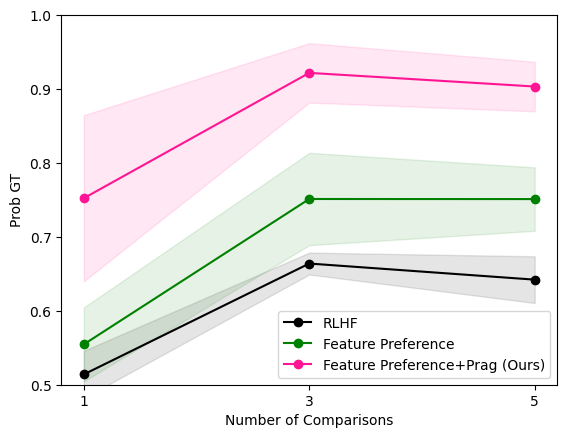

In [7]:
# PLOT COMPARISONS (MUSHROOMS) 1feat
comparisons = [1,3,5]

rlhf_probs = [0.5139594571979203, 0.6639371815363689, 0.6421352704319956]
rlhf_probs_err = [0.03196437593034217, 0.014815862723445088, 0.031615776541464705]
featureprefs_probs = [0.554616311233713, 0.7512521622501148, 0.7511363975200146]
featureprefs_probs_err = [0.04997614453876746, 0.06246466337395877, 0.04291517506212457]
featureprefshuman_probs = [0.7523153393569742, 0.9218705127673061, 0.9034135807461049]
featureprefshuman_probs_err = [0.11235213337058474, 0.04020499083506786, 0.033508763654611326]

save_loc = '../results/user_study/1feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err)

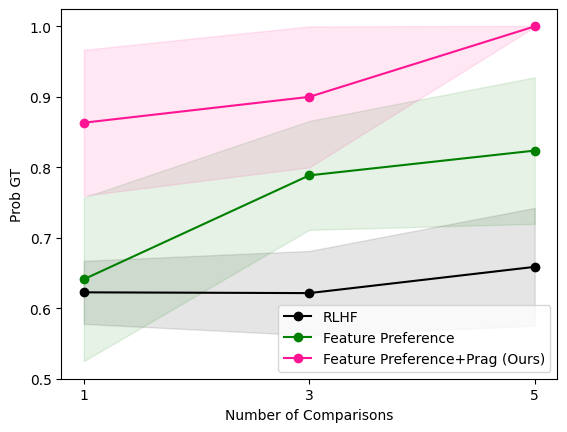

In [8]:
# PLOT COMPARISONS (MUSHROOMS) 3feat
comparisons = [1,3,5]

rlhf_probs = [0.6225956190515447, 0.6215133371452491, 0.658744924115362]
rlhf_probs_err = [0.04476245626949319, 0.059835672190177135, 0.08364777905319327]
featureprefs_probs = [0.6411546611123615, 0.7885764051963902, 0.8237328868972058]
featureprefs_probs_err = [0.11614245869663306, 0.07726121768605061, 0.10400011677758626]
featureprefshuman_probs = [0.8633050351231187, 0.899992193557598, 0.9999982209117325]
featureprefshuman_probs_err = [0.10345058242628588, 0.09999812033172227, 0.000729161272194857]

save_loc = '../results/user_study/3feat'
plot_comparisons(comparisons, rlhf_probs, featureprefs_probs, featureprefshuman_probs, 'Prob GT', save_loc, rlhf_probs_err, featureprefs_probs_err, featureprefshuman_probs_err)